# Exercise 2

In [1]:
# Get thinkdsp.py

import os

if not os.path.exists('thinkdsp.py'):
    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkdsp.py

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from thinkdsp import decorate
from thinkdsp import Chirp
from thinkdsp import SawtoothSignal 

In [3]:
class SawtoothChirp(Chirp):
    def __init__(self, start=330, end=550, amp=1.0):
        self.start = start
        self.end = end
        self.amp = amp

    def evaluate(self,ts):
        freqs = np.linspace(self.start, self.end, len(ts))
        return self._evaluate(freqs,ts)

    def _evaluate(self,freqs,ts):
        ys = ((ts%(1/freqs)/(1/freqs))*2-1)*self.amp
        return ys

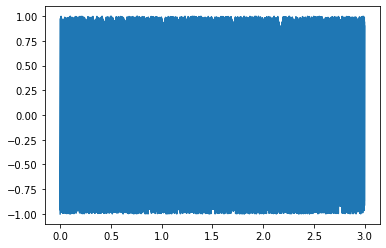

In [4]:
sig = SawtoothChirp()
wave = sig.make_wave(duration=3) 

#turn this to n-seconds (n>1s) if you want to heard the sound
#otherwise, turn this to smaller value to see the wave

#default framerate=11025 HZ
wave.plot()
wave.make_audio()

In [5]:
def plot_spectrogram(wave, seg_length):
    """
    """
    spectrogram = wave.make_spectrogram(seg_length)
    print('Time resolution (s)', spectrogram.time_res)
    print('Frequency resolution (Hz)', spectrogram.freq_res)
    spectrogram.plot(high=700)
    decorate(xlabel='Time(s)', ylabel='Frequency (Hz)')

Time resolution (s) 0.046439909297052155
Frequency resolution (Hz) 21.533203125


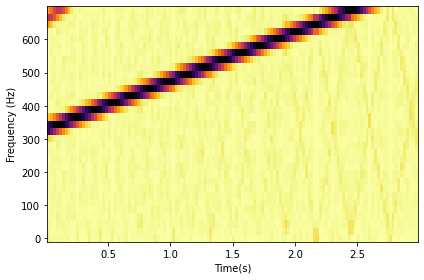

In [6]:
plot_spectrogram(wave, 512)

# Exercise 3

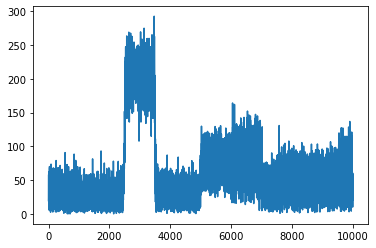

In [7]:
sig = SawtoothChirp(start=2500,end=3000)
wave = sig.make_wave(duration=1,framerate=20000)
spectrum = wave.make_spectrum()
spectrum.plot()